<a href="https://colab.research.google.com/github/Ahmedzedan0/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

2)Data Collection & Processing

In [20]:
# loading the data from sklearn
breast_cancer_row_dataset = sklearn.datasets.load_breast_cancer()
# loading the data to a data frame
breast_cancer_dataset = pd.DataFrame(breast_cancer_row_dataset.data, columns = breast_cancer_dataset.feature_names)

In [21]:
# loading the data to a data frame
breast_cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# adding the 'target' column to the data frame
breast_cancer_dataset['label'] = breast_cancer_row_dataset.target

In [23]:
breast_cancer_dataset.shape

(569, 31)

In [25]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [26]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [28]:
# statistical measures about the data
breast_cancer_dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [30]:
# checking the distribution of Target Varibale
# 1 is Benign
# 0 is Malignant
breast_cancer_dataset['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [33]:
breast_cancer_dataset.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [34]:
#Separating the features and target
X = breast_cancer_dataset.drop(columns='label', axis=1)
Y = breast_cancer_dataset['label']
print(X, 5*'\n', Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [35]:
# Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=1)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [37]:
# Standardize the data

In [39]:
from sklearn.preprocessing import StandardScaler

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [40]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(1)   # 
from tensorflow import keras

In [73]:
# setting up the layers of Neural Network
# after trying some layer denses and varying number of epochs , i have choosen 512 hidden layer,10
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])


# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# training the Neural Network

Model = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10) # M odel ... m odel 

Epoch 1/10
13/13 [==============================] - 2s 53ms/step - loss: 0.3858 - accuracy: 0.8191 - val_loss: 0.1526 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.9462 - val_loss: 0.0863 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0956 - accuracy: 0.9731 - val_loss: 0.0621 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0815 - accuracy: 0.9804 - val_loss: 0.0533 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9804 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0648 - accuracy: 0.9853 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0592 - accuracy: 0.9829 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 8/10
13/13 [

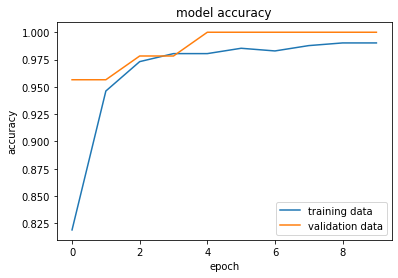

In [74]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

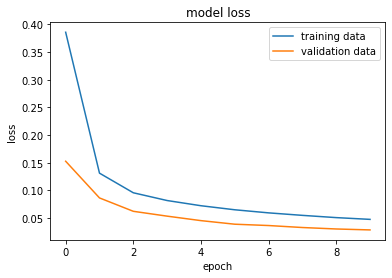

In [76]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [96]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)
print(X_train_std, 5*'\n',Y_train)

4/4 [==============================] - 0s 9ms/step - loss: 0.0618 - accuracy: 0.9912
0.9912280440330505
[[ 0.05563811  0.89626203  0.12598506 ...  0.92395547  3.51208834
   3.16267643]
 [ 1.27666753 -0.18552085  1.23829341 ...  0.72724847  1.20540467
   0.05133297]
 [-0.18050438  0.28481953 -0.1124559  ...  1.34611894  1.03291303
   1.37977769]
 ...
 [-0.72190422 -1.02978185 -0.72707596 ... -0.30349618 -0.41131243
  -0.35603558]
 [-0.53183831 -1.22967651 -0.58642492 ... -1.47708037 -0.99307969
  -1.2935123 ]
 [ 1.48689193 -0.79225995  1.45467962 ...  0.93152112 -0.75786382
  -1.18029559]] 




 190    0
85     0
512    0
57     0
142    1
      ..
201    0
285    1
249    1
316    1
161    0
Name: label, Length: 455, dtype: int64


In [97]:
Y_pred = model.predict(X_test_std)
print(Y_pred) # [%of Malignant, % of Benign] 

[[1.90778136e-01 8.09102774e-01]
 [9.28000629e-01 8.00997317e-02]
 [1.26634777e-01 7.99600244e-01]
 [2.37322450e-02 9.67062235e-01]
 [9.80506301e-01 1.04072690e-02]
 [1.60651207e-02 9.58231390e-01]
 [2.66458988e-02 9.45645094e-01]
 [3.14348340e-02 9.43096876e-01]
 [9.99761939e-01 6.40224534e-05]
 [1.97105706e-02 9.69814181e-01]
 [5.05672097e-01 4.50333476e-01]
 [5.42724729e-02 8.76851737e-01]
 [1.45801902e-03 9.95283127e-01]
 [7.95200884e-01 1.25518352e-01]
 [2.05771327e-02 9.59708631e-01]
 [3.90749276e-02 9.46245313e-01]
 [1.44327432e-01 8.06537807e-01]
 [9.97183740e-01 1.91083550e-03]
 [4.39360738e-03 9.91504669e-01]
 [8.87875736e-01 1.23969346e-01]
 [1.44585967e-02 9.62843299e-01]
 [5.92916012e-01 4.09612179e-01]
 [6.13442063e-03 9.67613399e-01]
 [7.06755221e-02 9.35607672e-01]
 [7.82797039e-02 8.37136686e-01]
 [9.99793291e-01 9.03599575e-05]
 [9.55115378e-01 1.44272149e-02]
 [1.97668374e-02 9.33887362e-01]
 [9.99530375e-01 2.46614218e-04]
 [9.99556541e-01 2.40117311e-04]
 [9.988102

In [98]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


**Building the predictive system**

In [99]:
breast_cancer_dataset.iloc[5:15, :]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230,0
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310,0


In [100]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = StandardScaler().fit_transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

[[0.4443154  0.53104913]]
[1]
The tumor is Benign
